# Image noise rejection

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\C}{\mathbf{C}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$



__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_
_<div style="text-align: right"> Jun-Hyon Cho (junhyoncho@khu.ac.kr) </div>_

In this assignment, we are going to expand our knowledge on Fourier transform to image processing examples. For a two-dimensional signal, the 2D FFT is stated as below.

$$
F(x,y) = \sum^{M-1}_{m=0} \sum^{N-1}_{n=0} f(m, n) \text{exp}\left\{ -j2\pi\left( x \frac{m}{M} + y \frac{n}{N} \right) \right\}
$$

You may be scared of this complicated equation, but don't mind because you can just let your computer do the calculations. By running the below cell, you can load one of the most famous images in the image processing field, named "Lena". We distorted it for a little fun.


In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
X = plt.imread('https://people.sc.fsu.edu/~jburkardt/data/png/lena.png') #2D FFT 구현. 
X_noise = X.copy()
n = np.zeros(X.shape)
for i in range(128):
  for j in range(128):
    n[4*i:2+4*i:, 4*j:2+4*j] = 1
X_noise = X + n

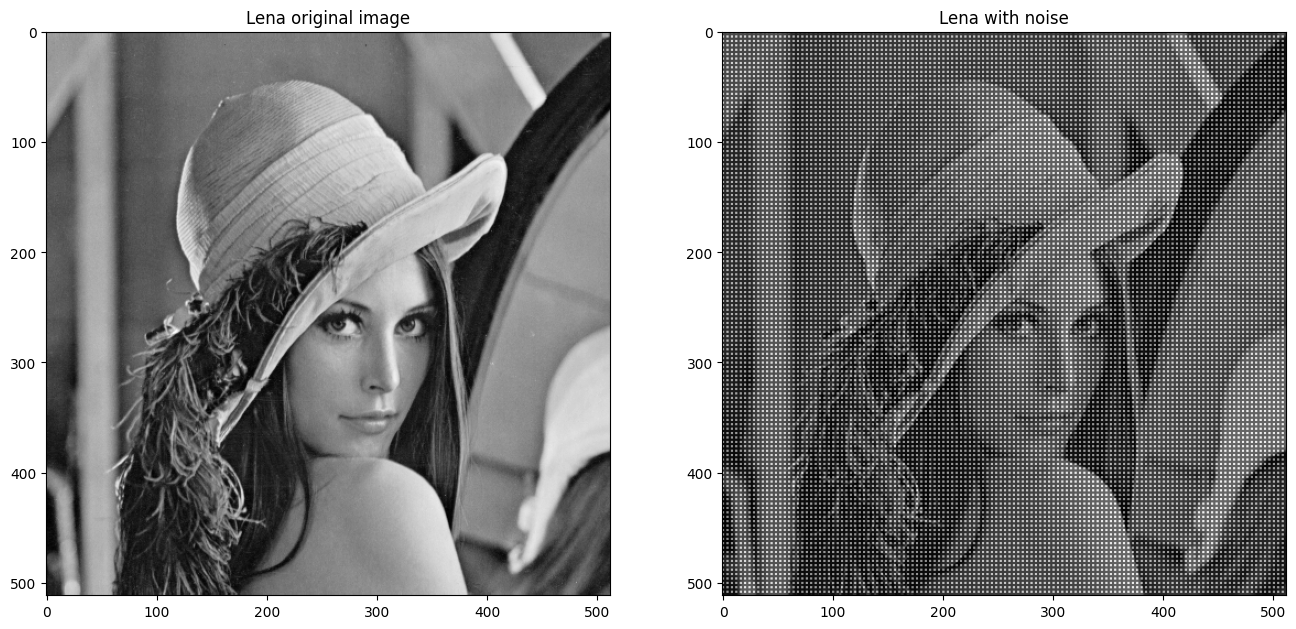

In [72]:
plt.figure(figsize=(16, 9), dpi=100)
plt.subplot(121)
plt.imshow(X, cmap = 'gray')
plt.title("Lena original image")
plt.subplot(122)
plt.imshow(X_noise, cmap = 'gray')
plt.title("Lena with noise")
plt.show()

<br>

__*(Problem 1)*__ Compute the two-dimensional Fourier transform of the original "Lena" image. You can use `numpy.fft.fft2()` for doing this. Explain what it means by the frequency of an image.

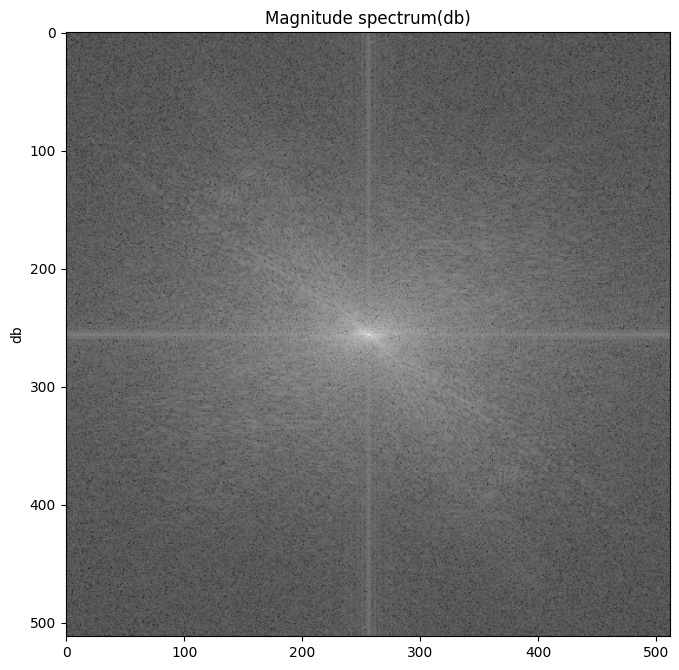

In [73]:
X_fft1 = np.fft.fftshift(np.fft.fft2(X)) #주파수가 0인 부분을 중앙에 재 할당(fft.sh)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(20*np.log(abs(X_fft1)), cmap = 'gray') #magnitude spectrum
plt.ylabel('db')
plt.title("Magnitude spectrum(db)")
plt.show()

이미지의 주파수 영역은 밝기가 얼마나 빨리 변화하는지를 나타낸다.

<br>

__*(Problem 2)*__ Compute the two-dimensional Fourier transform of the distorted imge. What is the differnce with the result you obtained from Problem 1? You may find nine tiny white dots from your result.  

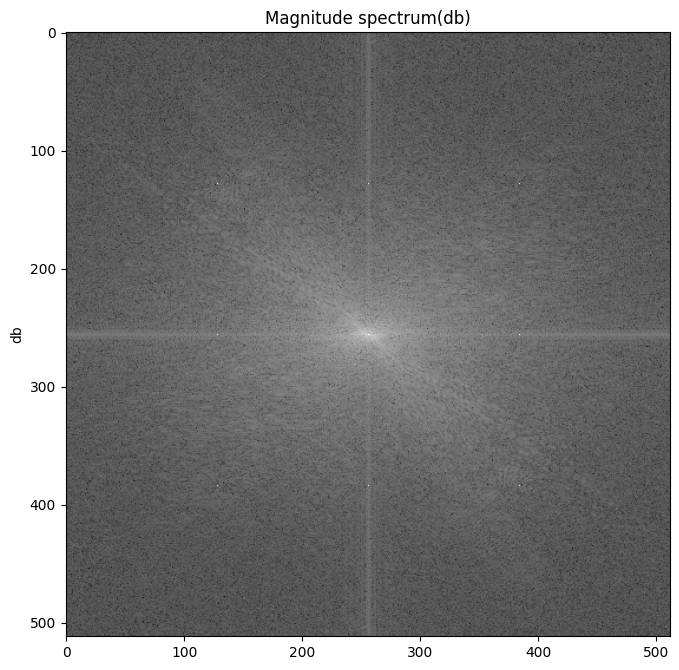

In [74]:
X_fft2 = np.fft.fftshift(np.fft.fft2(X_noise)) #이미지 0,0인 곳에 저주파수 할당. (fft.sh)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(20*np.log(abs(X_fft2)), cmap = 'gray') #magnitude spectrum
plt.ylabel('db')
plt.title("Magnitude spectrum(db)")
plt.show()


흰 점은 영역에서 저주파수 함량이 더 많음을 나타낸다.

<br>

__*(Problem 3)*__ Erase those dots except for the one at the origin. Next, try to erase all the dots including the dot at the origin. In practice, we have to design notch filters or something like that, but we will not talk about those because this is not a signal processing class. Instead, you can just put black-boxes (about the size of 10x10) on top of the dots. 

Compute the inverse two-dimensional Fourier Transform on the black-box-filtered results, respectively. You will find the latter one is awful. Explain why.

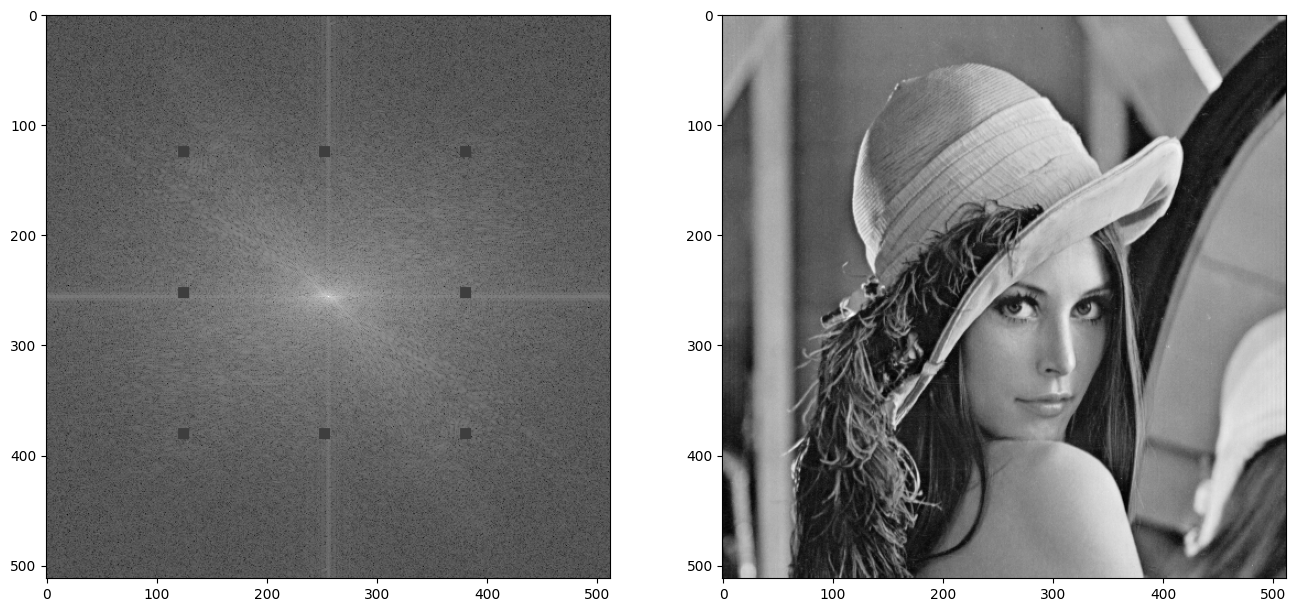

In [78]:
for i in range(3):
  for j in range(3):
    if (i==1) & (j==1):
      continue
    else :
      X_fft2[120+128*i:130+128*i, 120+128*j:130+128*j] = 1 #노이즈 영역 제거

X_recon1 = np.fft.ifft2(np.fft.fftshift(X_fft2))

plt.figure(figsize=(16, 9), dpi=100)
plt.subplot(121)
plt.imshow(20*np.log(abs(X_fft2)), cmap = 'gray')
plt.subplot(122)
plt.imshow(abs(X_recon1), cmap = 'gray')
plt.show()


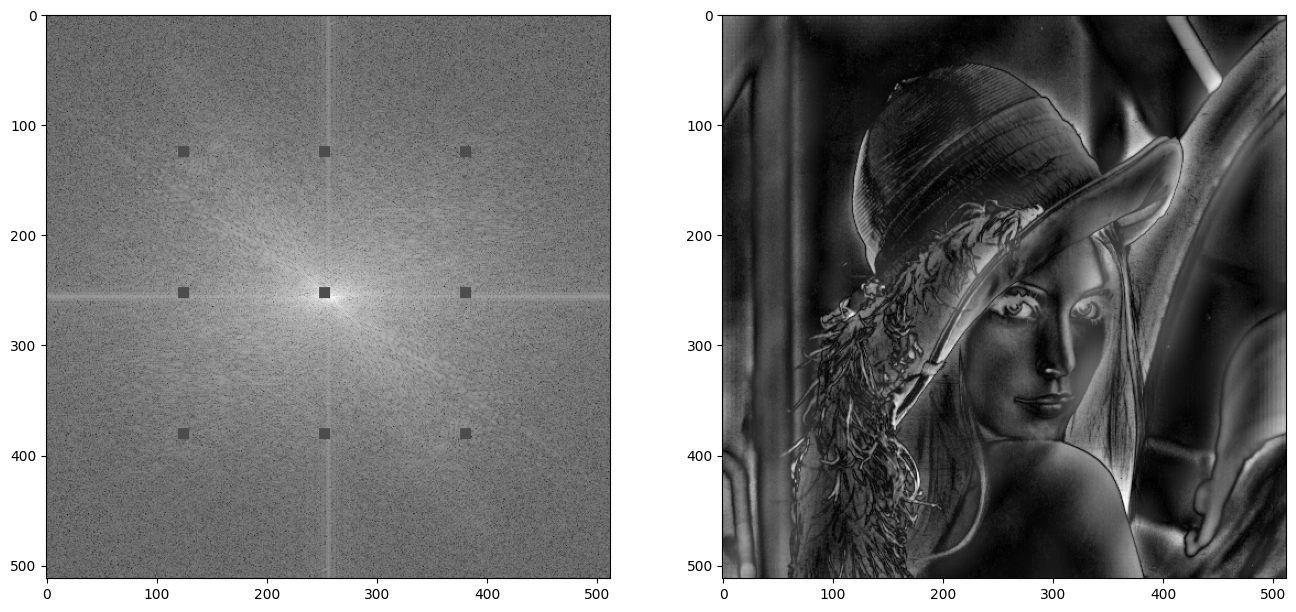

In [79]:

X_fft3 = np.fft.fftshift(np.fft.fft2(X_noise))
for i in range(3):
  for j in range(3):
    X_fft3[120+128*i:130+128*i, 120+128*j:130+128*j] = 1

X_recon2 = np.fft.ifft2(np.fft.fftshift(X_fft3))

plt.figure(figsize=(16, 9), dpi=100)
plt.subplot(121)
plt.imshow(20*np.log(abs(X_fft3)), cmap = 'gray')
plt.subplot(122)
plt.imshow(abs(X_recon2), cmap = 'gray')
plt.show()

흰점 영역은 저주파수 영역이다. 이를 black box로 가린다는 것은 HPF가 적용됨과 같은 효과를 낸다.